In [1]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout,Input,Flatten,Dense,MaxPooling2D
#from tensorflow.keras.optimizers import Adam #for backpropagation
from tensorflow.keras.preprocessing.image import ImageDataGenerator #data augmentation

In [2]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [3]:
batchsize=8

In [4]:
train_datagen=ImageDataGenerator(rescale=1./255,rotation_range=0.2,shear_range=0.2,
                                zoom_range=0.2,width_shift_range=0.2,
                                height_shift_range=0.2,validation_split=0.2)

In [5]:
train_data= train_datagen.flow_from_directory(r'C:\Users\dhany\Downloads\mrlEyes_2018_01\Prepared_Data\train',
                                             target_size=(80,80),batch_size=batchsize,class_mode='categorical',subset='training')

validation_data= train_datagen.flow_from_directory(r'C:\Users\dhany\Downloads\mrlEyes_2018_01\Prepared_Data\train',
                                                  target_size=(80,80),batch_size=batchsize,class_mode='categorical',subset='validation')

Found 64683 images belonging to 2 classes.
Found 16169 images belonging to 2 classes.


In [6]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_data= test_datagen.flow_from_directory(r'C:\Users\dhany\Downloads\mrlEyes_2018_01\Prepared_Data\test',
                                           target_size=(80,80),batch_size=batchsize,class_mode='categorical')

Found 4046 images belonging to 2 classes.


In [7]:
bmodel = InceptionV3(include_top=False,weights='imagenet',input_tensor=Input(shape=(80,80,3)))
hmodel = bmodel.output 
hmodel = Flatten()(hmodel)
hmodel = Dense(64,activation='relu')(hmodel)
hmodel = Dropout(0.5)(hmodel) #dropout to prevent overfitting 
hmodel = Dense(2,activation='softmax')(hmodel)

model = Model(inputs=bmodel.input, outputs=hmodel)
for layer in bmodel.layers:
    layer.trainable = False


In [8]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 80, 80, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 39, 39, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 39, 39, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 39, 39, 32)   0           ['batch_normalization[0][0]']

In [9]:
bmodel.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 80, 80, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 39, 39, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 39, 39, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 39, 39, 32)   0           ['batch_normalization[

In [12]:
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit_generator(train_data,steps_per_epoch=train_data.samples//batchsize,
                   validation_data=validation_data,
                   validation_steps=validation_data.samples//batchsize,
                   callbacks=callbacks,
                   epochs=5)

C:\Users\dhany\AppData\Local\Temp\ipykernel_2504\834762588.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_data,steps_per_epoch=train_data.samples//batchsize,


Epoch 1/5
8084/8085 [============================>.] - ETA: 0s - loss: 0.1935 - accuracy: 0.9263
Epoch 1: val_loss improved from inf to 0.24845, saving model to C:\Users\dhany\Documents\ml\models\model.h5
8085/8085 [==============================] - 846s 102ms/step - loss: 0.1935 - accuracy: 0.9263 - val_loss: 0.2485 - val_accuracy: 0.9024 - lr: 0.0010
Epoch 2/5
8084/8085 [============================>.] - ETA: 0s - loss: 0.1627 - accuracy: 0.9384
Epoch 2: val_loss improved from 0.24845 to 0.23423, saving model to C:\Users\dhany\Documents\ml\models\model.h5
8085/8085 [==============================] - 785s 97ms/step - loss: 0.1627 - accuracy: 0.9384 - val_loss: 0.2342 - val_accuracy: 0.9039 - lr: 0.0010
Epoch 3/5
8084/8085 [============================>.] - ETA: 0s - loss: 0.1538 - accuracy: 0.9410
Epoch 3: val_loss improved from 0.23423 to 0.23039, saving model to C:\Users\dhany\Documents\ml\models\model.h5
8085/8085 [==============================] - 788s 97ms/step - loss: 0.1538 - a

In [13]:
#model evaluation

In [14]:
loss_tr, acc_tr = model.evaluate_generator(train_data)
print(acc_tr)
print(loss_tr)

C:\Users\dhany\AppData\Local\Temp\ipykernel_2504\515593128.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss_tr, acc_tr = model.evaluate_generator(train_data)


0.9511463642120361
0.12618716061115265


In [15]:
loss_vr, acc_vr = model.evaluate(validation_data)
print(acc_vr)
print(loss_vr)

2022/2022 [==============================] - 151s 75ms/step - loss: 0.2685 - accuracy: 0.9038
0.9037664532661438
0.26851487159729004


In [16]:
loss_test, acc_test = model.evaluate_generator(test_data)
print(acc_test)
print(loss_test)

C:\Users\dhany\AppData\Local\Temp\ipykernel_2504\1982603442.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss_test, acc_test = model.evaluate_generator(test_data)


0.8168561458587646
0.49123674631118774


In [17]:
import cv2
import matplotlib.pyplot as plt


In [18]:
img= cv2.imread(r'D:\college\3-2 semester\dl\drowsiness\the-facebible-puffy-eyes-tired-eyes-1.jpg')
tempimg = img
img = cv2.resize(img,(80,80))
img = img/255.0
img = img.reshape(1,80,80,3)
model.predict(img)

1/1 [==============================] - 3s 3s/step


array([[0.00675926, 0.9932407 ]], dtype=float32)

1/1 [==============================] - 0s 31ms/step
[[0.00675926 0.9932407 ]]
Prediction:  Open


Text(0.5, 1.0, 'Open')

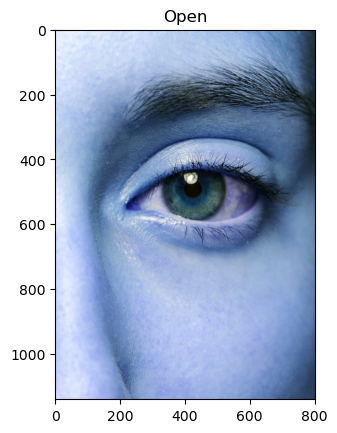

In [19]:
prediction = model.predict(img)
print(prediction)

if prediction[0][0]>=0.5:
  prediction = "Closed"
else:
  prediction = "Open"
print("Prediction: ",prediction)
plt.imshow(tempimg)
plt.imshow(tempimg)
plt.title(prediction)

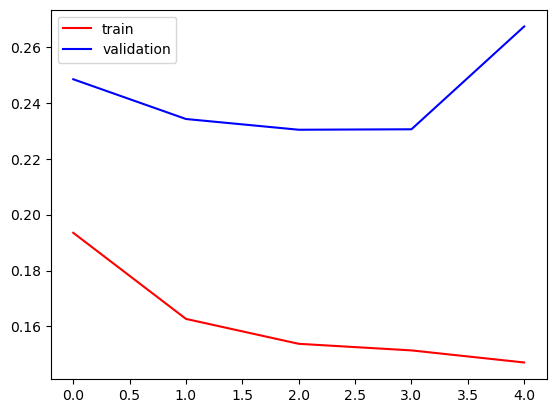

In [20]:

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

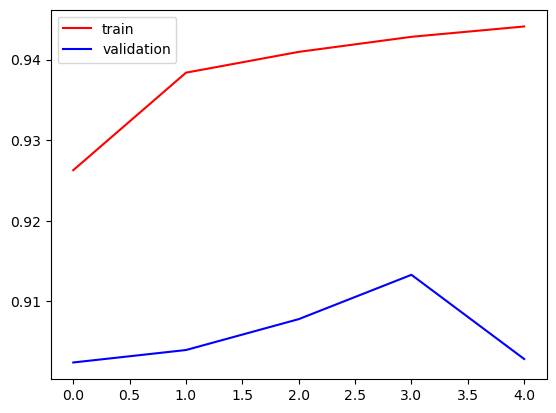

In [21]:


plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()